### Creating a simple bar plot to show imbalances of the models
The gloabl mean TOA radiation values for CERES are plotted from 2001 to 2021. You can choose which year of the simulatiom should be plotted.

In [1]:
from aqua import Reader, catalogue, inspect_catalogue
import sys
import os
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
%env PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/

FDB5 binary library not present on system, disabling FDB support.
env: PATH=/sw/spack-levante/texlive-live2021-l5o6sw/bin/x86_64-linux:/sw/spack-levante/texlive-live2021-l5o6sw/bin:/sw/spack-levante/git-lfs-2.11.0-oihcwo/bin:/sw/spack-levante/git-2.31.1-25ve7r/bin:/sw/spack-levante/jupyterhub/jupyterhub/bin:/sw/spack-workplace/spack/bin:/usr/share/Modules/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/home/b/b382257/.conda/envs/aqua/bin/


In [2]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_directory)
from functions import radiation_diag

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [3]:
TOA_ifs_4km_gm, reader_ifs_4km, data_ifs_4km, TOA_ifs_4km, TOA_ifs_4km_r360x180 = radiation_diag.process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')

2023-07-06 15:18:13 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco2559-ng5-cycle3, source lra-r100-monthly


In [4]:
TOA_ifs_9km_gm, reader_ifs_9km, data_ifs_9km, TOA_ifs_9km, TOA_ifs_9km_r360x180 = radiation_diag.process_model_data(model =  'IFS' , exp = 'tco1279-orca025-cycle3' , source = 'lra-r100-monthly')

2023-07-06 15:18:19 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco1279-orca025-cycle3, source lra-r100-monthly


In [5]:
TOA_icon_gm, reader_icon, data_icon, TOA_icon, TOA_icon_r360x180 = radiation_diag.process_model_data(model =  'ICON' , exp = 'ngc3028' , source = 'lra-r100-monthly')

In [6]:
# Call the method to retrieve CERES data
TOA_ceres_clim_gm, TOA_ceres_ebaf_gm, TOA_ceres_diff_samples_gm, reader_ceres_toa, TOA_ceres_clim, TOA_ceres_diff_samples = radiation_diag.process_ceres_data(exp = "ebaf-toa41", source = "monthly", TOA_icon_gm=TOA_icon_gm)

In [7]:
data_era5, reader_era5 = radiation_diag.process_era5_data(exp = "era5" , source = "monthly")

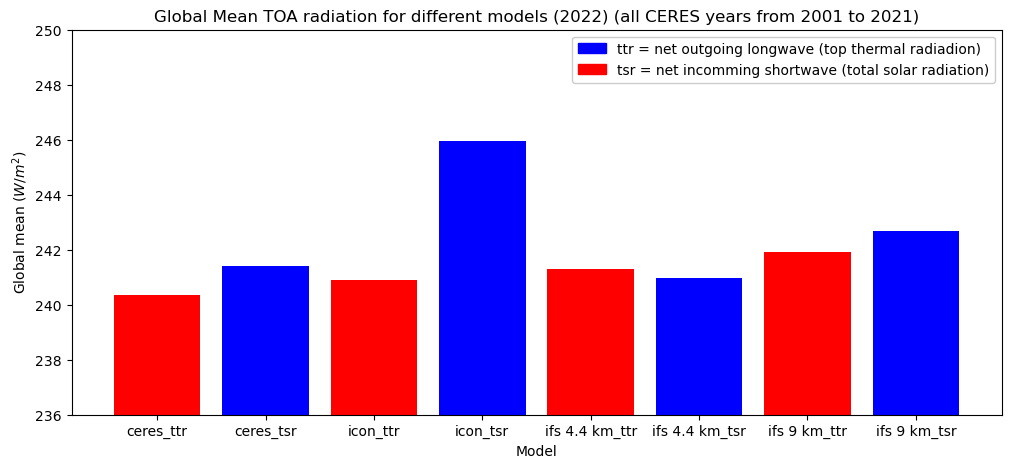

Plot has been saved to ./output/figs.


In [8]:
datasets = [TOA_ceres_clim_gm, TOA_icon_gm, TOA_ifs_4km_gm, TOA_ifs_9km_gm]
model_names = ['ceres', 'icon', 'ifs 4.4 km', 'ifs 9 km']

radiation_diag.barplot_model_data(datasets, model_names, year = 2022)

A similar method will be introduced in the upcomming version of this diagnostic. This will include a boxplot showing more statistics such as median, quantiles, etc.